# Conectar e interactuar con API Python

In [3]:
import os
import pandas as pd
import seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt


# Conectamos con la API

In [4]:
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(
    client_id="3233166ec6424efc85ac5fb6c2f4ddf5",
    client_secret="e1f97fd1c0f84246a68a4b50672784df"
))


A pesar de que no es el método mas seguro, no he conseguido hacer funcionar en la variable .env los datos.


Lo siguiente es sacar los datos del artista que elijamos y sus 10 tracks mas populares: 

In [5]:
# Get artist information by ID
artist_id = "7nzSoJISlVJsn7O0yTeMOB"  # Joe Hisaishi
top_tracks = spotify.artist_top_tracks(artist_id)

#Sacamos las 10 más populares
top_10_tracks = top_tracks['tracks'][:10]

Lo siguiente es preparar una lista para guardar de manera ordenada en un DataFrame info sobre esos tracks para poder consultar

In [6]:
# Preparamos la lista de lo que vamos a guardar en el DataFrame

tracks_info = []

for track in top_10_tracks: #Iteramos para guardar de manera efectiva los campos que nos interesan
    track_info = {
        "Track Name": track['name'],
        "Popularity": track['popularity'],
        "Duration (min)": track['duration_ms'] / 60000  # Convert from milliseconds to minutes
    }
    tracks_info.append(track_info)

Convertimos a DataFrame y ordenamos el mismo para mostrar las tres más populares.

He usado .to_string para arreglar un problema con el tabulado a la hora de presentar los titulos de los campos

In [9]:
# Como se pide, convertimos a DF
df_tracks = pd.DataFrame(tracks_info)

#Ordenamos para mostrar las tres mas populares
df_sorted = df_tracks.sort_values(by="Popularity", ascending=False).head(3)
print("Las tres canciones mas populares son:\n")
print(df_sorted.to_string(index=False))

Las tres canciones mas populares son:

                                          Track Name  Popularity  Duration (min)
Merry-Go-Round of Life - from 'Howl's Moving Castle'          66        5.185100
                                   The Flower Garden          63        2.975100
                                      One Summer Day          62        3.163333


Creamos un plot para explorar la relación entre popularidad y duración de la canción: 

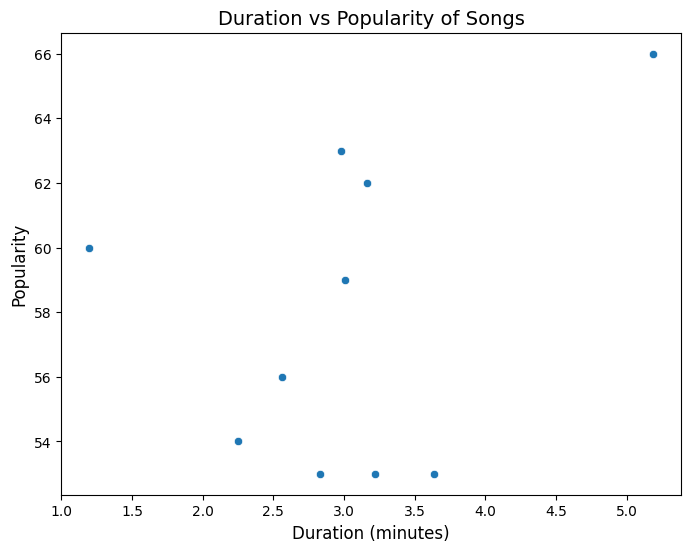

In [10]:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_tracks, x='Duration (min)', y='Popularity')

plt.title('Duration vs Popularity of Songs', fontsize=14)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Popularity', fontsize=12)

plt.show()


Como se demuestra en el gráfico, se intuye que hay relación entre popularidad y duración de la canción.

He visto como se importaba la librería seaborn y he buscado una manera de poder conocer algún gráfico para explorar dicha relación: 


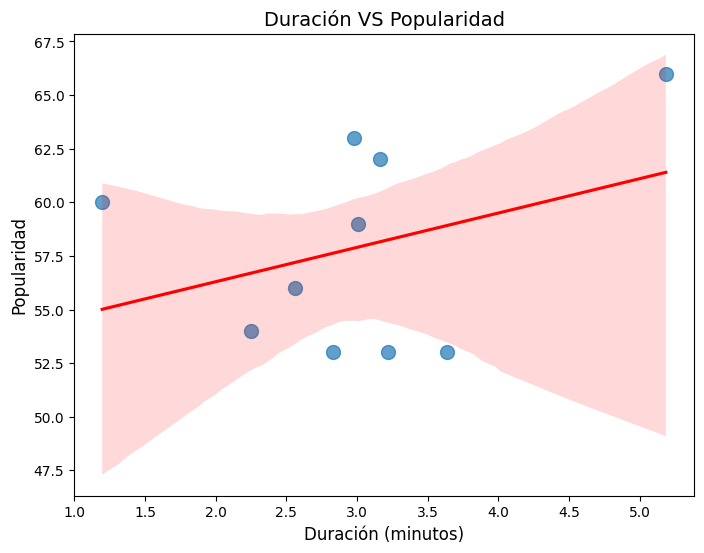

In [11]:
# Scatter plot con linea de regresión

plt.figure(figsize=(8, 6))
sns.regplot(data=df_tracks, x='Duration (min)', y='Popularity', scatter_kws={'s': 100, 'alpha': 0.7}, line_kws={'color': 'red'})

plt.title('Duración VS Popularidad', fontsize=14)
plt.xlabel('Duración (minutos)', fontsize=12)
plt.ylabel('Popularidad', fontsize=12)
plt.show()



Tal y como se muestra en la linea ascendente, si que está implícito (al menos en un caso con una muestra tan baja como este)
que, efectivamente, hay una relación entre las canciones mas largas y su popularidad.